In [192]:
from sympy import *
init_printing()
import scipy.signal as signal
import numpy as np

# 1

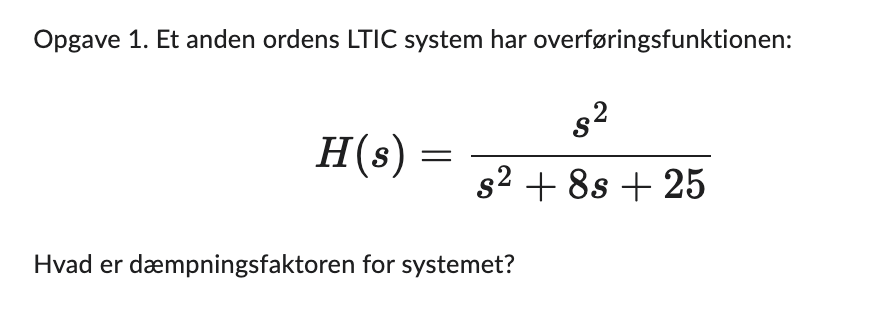

In [193]:
zeta, omega_n, s = symbols('zeta omega_n s')
def damping_factor(denom):
    # Step 0: define symbols
    zeta, omega_n, s = symbols('zeta omega_n s')

    # Step 1: define your transfer function denominator
    # denom = s**2 + 8*s + 25  -- for example
    denom = expand(denom)
    terms = denom.as_ordered_terms()
    display(terms)

    # Step 2: extract coefficients
    a2 = terms[0].coeff(s**2)  # coefficient of s**2 ⇒ 1
    a1 = terms[1].coeff(s)  # coefficient of s ⇒ 8
    a0 = terms[2]           # constant term ⇒ omega_n^2 ⇒ 25

    # Step 3:
    # Compare with standard form: s^2 + 2*zeta*omega_n*s + omega_n^2
    # and solve for omega_n and zeta
    omega_n_val = sqrt(a0)
    eq = Eq(2 * zeta * omega_n_val, a1)
    zeta_val = solve(eq, zeta)[0]

    return print(f"Damping factor (zeta) = {zeta_val}")

denom = s**2 + 8*s + 25
damping_factor(denom)

Damping factor (zeta) = 4/5


# 2

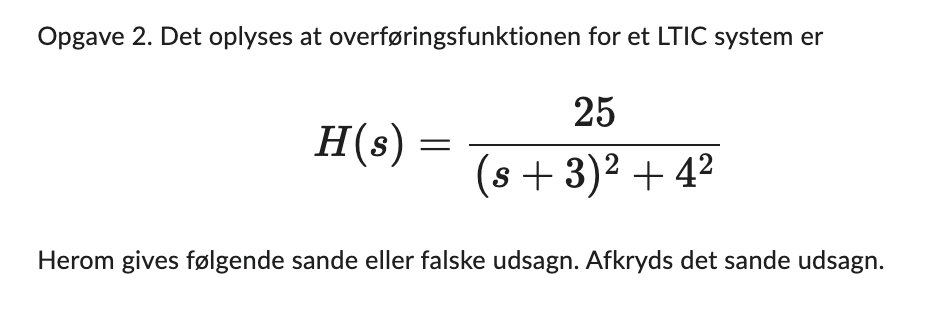

In [194]:
def damping_factor(denom):
    # Step 0: define symbols
    zeta, omega_n, s = symbols('zeta omega_n s')

    # Step 1: define your transfer function denominator
    # denom = s**2 + 8*s + 25  -- for example
    denom = expand(denom)
    terms = denom.as_ordered_terms()
    display(terms)

    # Step 2: extract coefficients
    a2 = terms[0].coeff(s**2)  # coefficient of s**2
    a1 = terms[1].coeff(s)     # coefficient of s
    a0 = terms[2]              # constant term ⇒ omega_n^2

    # Step 3:
    # Compare with standard form: s^2 + 2*zeta*omega_n*s + omega_n^2
    # and solve for omega_n and zeta
    omega_n_val = sqrt(a0)
    eq = Eq(2 * zeta * omega_n_val, a1)
    zeta_val = solve(eq, zeta)[0]

    return print(f"Damping factor (zeta) = {zeta_val}")

denom = (s+3)**2 + 4**2
damping_factor(denom)

Damping factor (zeta) = 3/5


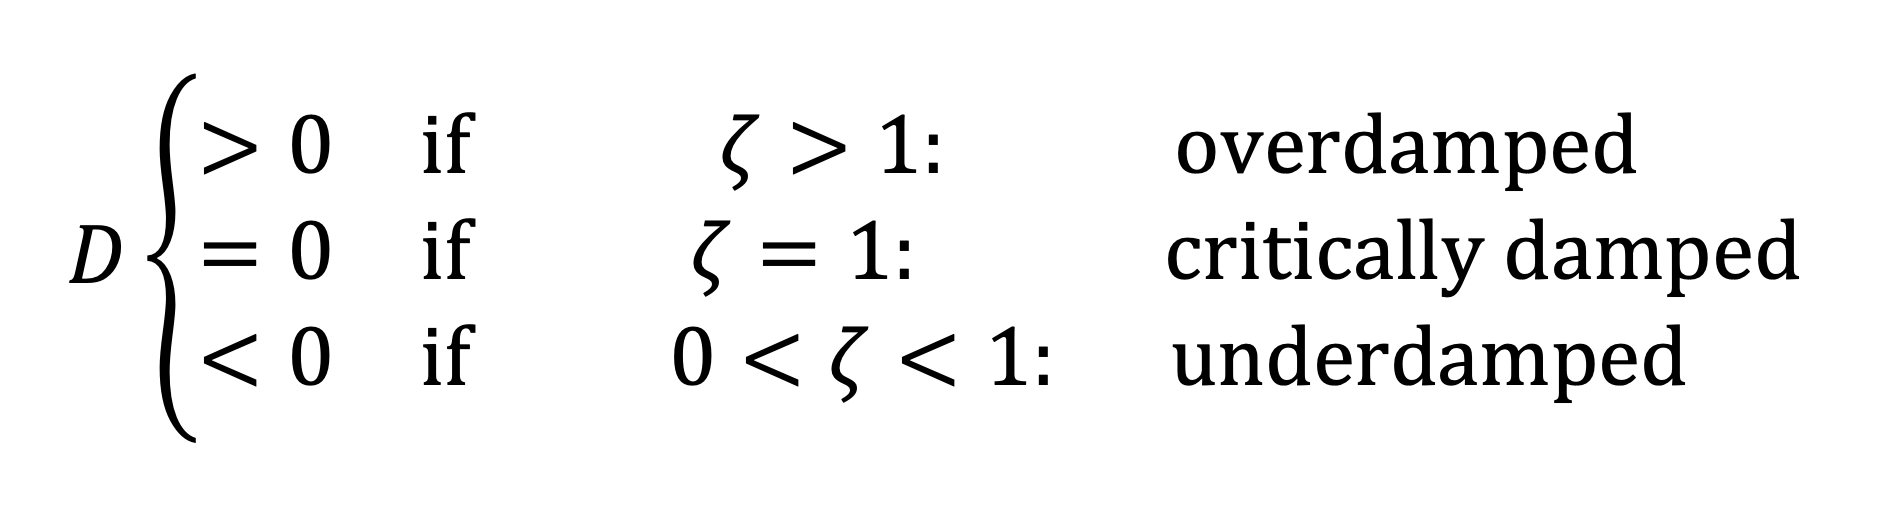

we conclude the system is underdamped since zeta (3/5) < 1

## damping

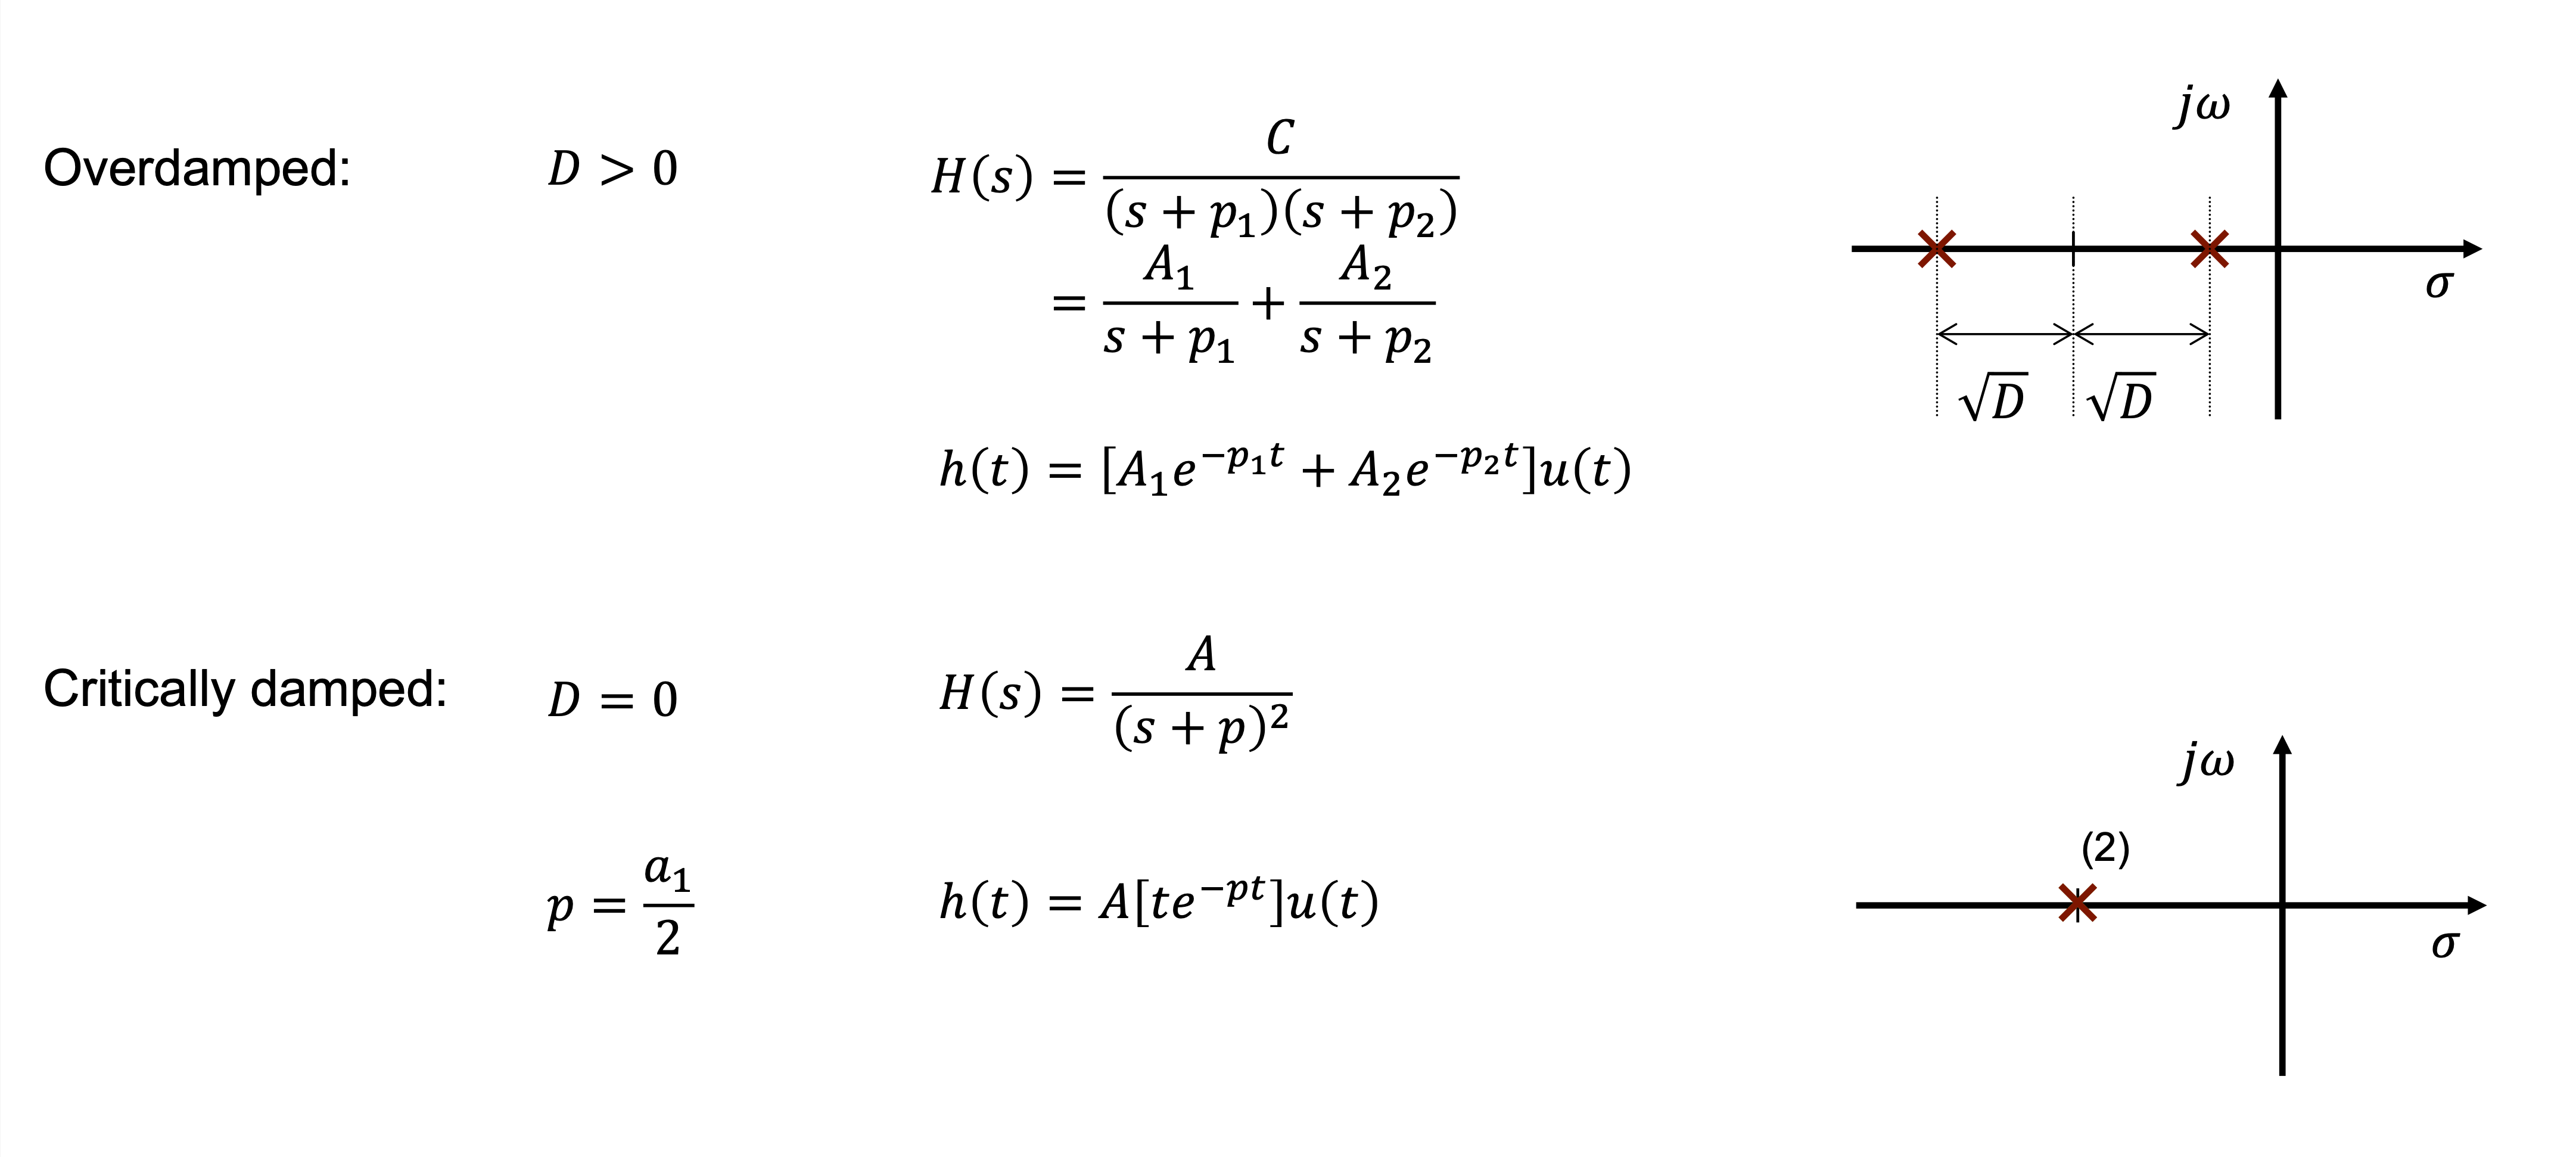

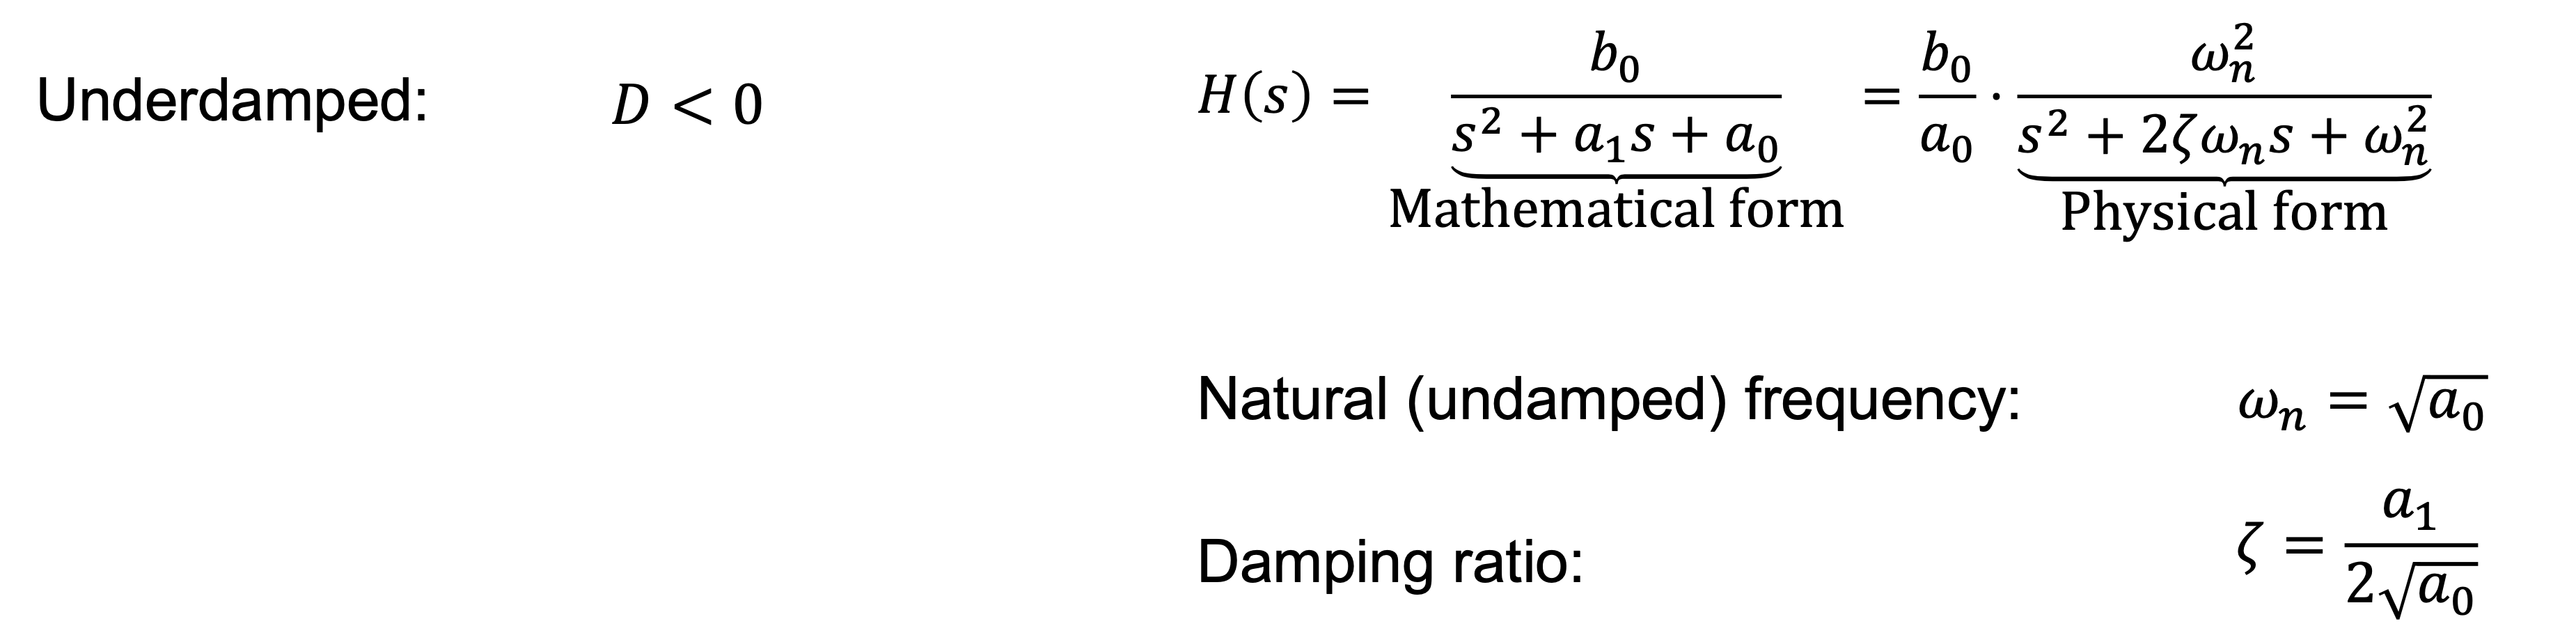



# 3

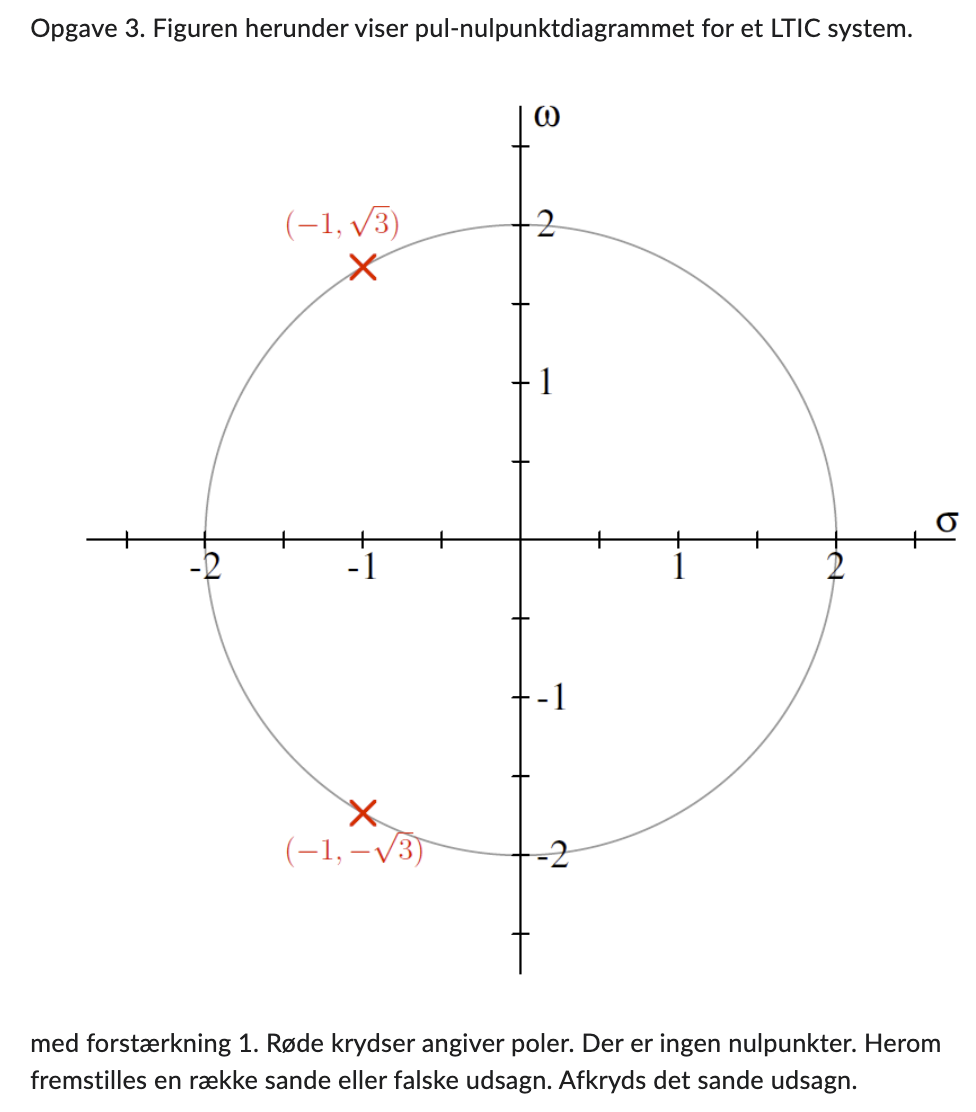

Natural frequency (omega_n):


Damping factor (zeta):


Denominator:


Poles:


H(s):


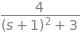

In [195]:
# Step 0: Define symbols
s, zeta, omega_n = symbols('s zeta omega_n', real=True)

# Step 1: Given poles
sigma_val = -1
omega_val = sqrt(3)

# Step 2: Calculate omega_n
omega_n_val = sqrt(sigma_val**2 + omega_val**2)
print(f"Natural frequency (omega_n):")
display(omega_n_val)

# Step 3: Calculate damping ratio
zeta_val = -sigma_val / omega_n_val
print(f"Damping factor (zeta):")
display(zeta_val)

# Step 4: Check transfer function H(s)
# Proposed: H(s) = 4 / ((s + 1)**2 + 3)
from sympy.abc import s
denom = (s + 1)**2 + 3
denom = simplify(denom)
print(f"Denominator:")
display(denom)

# Step 5: Solve for poles
poles = solve(denom, s)
print(f"Poles:")
display(poles)

K = 4
H_s = K / denom
print(f"H(s):")
display(H_s)

# 4

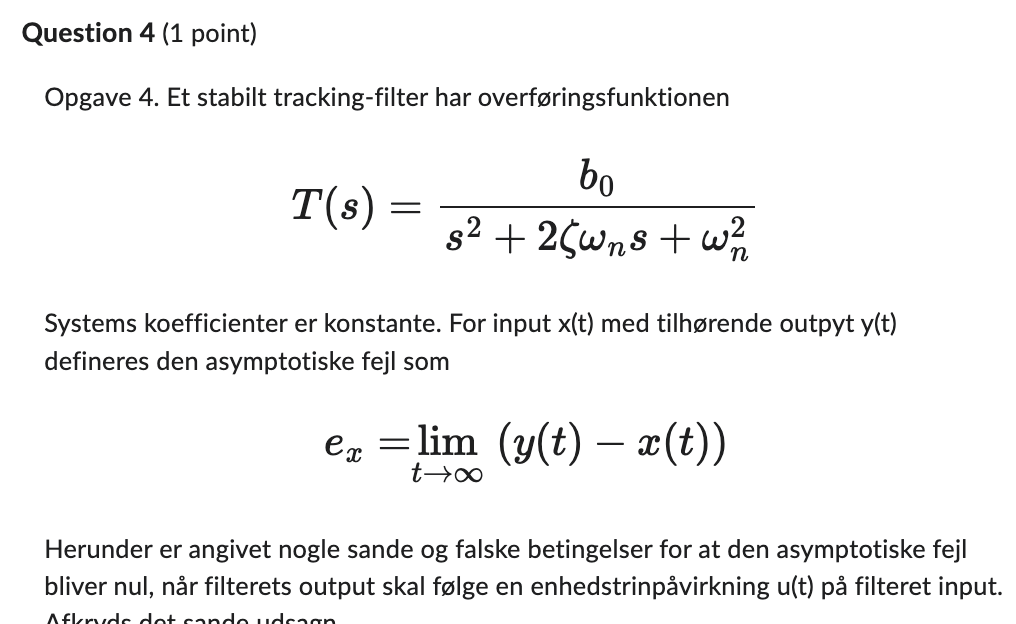

In [196]:
# Parameters
omega_n = 1.0
zeta = 1 / np.sqrt(2)
b0 = omega_n**2  # Only this matters for error

# Transfer function
system = signal.TransferFunction([b0], [1, 2*zeta*omega_n, omega_n**2])

# Step response to estimate final value
t, y = signal.step(system)
e_inf = y[-1] - 1  # step input → final value of input is 1

print(f"Asymptotic error e_x = {e_inf:.6f}")

Asymptotic error e_x = -0.001287


# 5

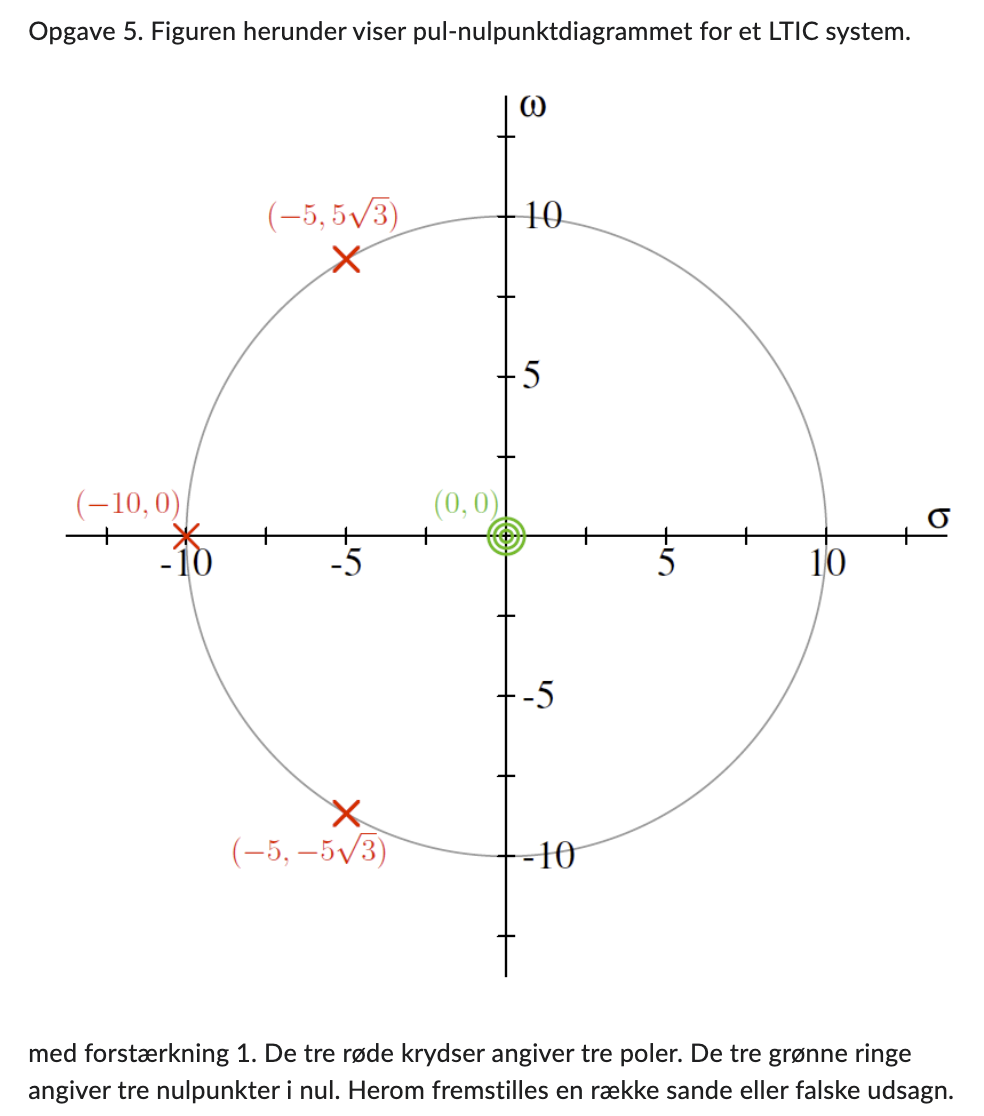

In [197]:
# Define zeros and poles based on the diagram
zeros = [0, 0, 0]  # Three zeros at origin
poles = [-10, -5 + 5*np.sqrt(3)*1j, -5 - 5*np.sqrt(3)*1j]

# Create transfer function
system = signal.ZerosPolesGain(zeros, poles, 1)  # Gain = 1

# Convert to transfer function (numerator/denominator)
tf = system.to_tf()
print("Transfer function H(s):")
print(tf)

Transfer function H(s):
TransferFunctionContinuous(
array([1., 0., 0., 0.]),
array([   1.,   20.,  200., 1000.]),
dt: None
)


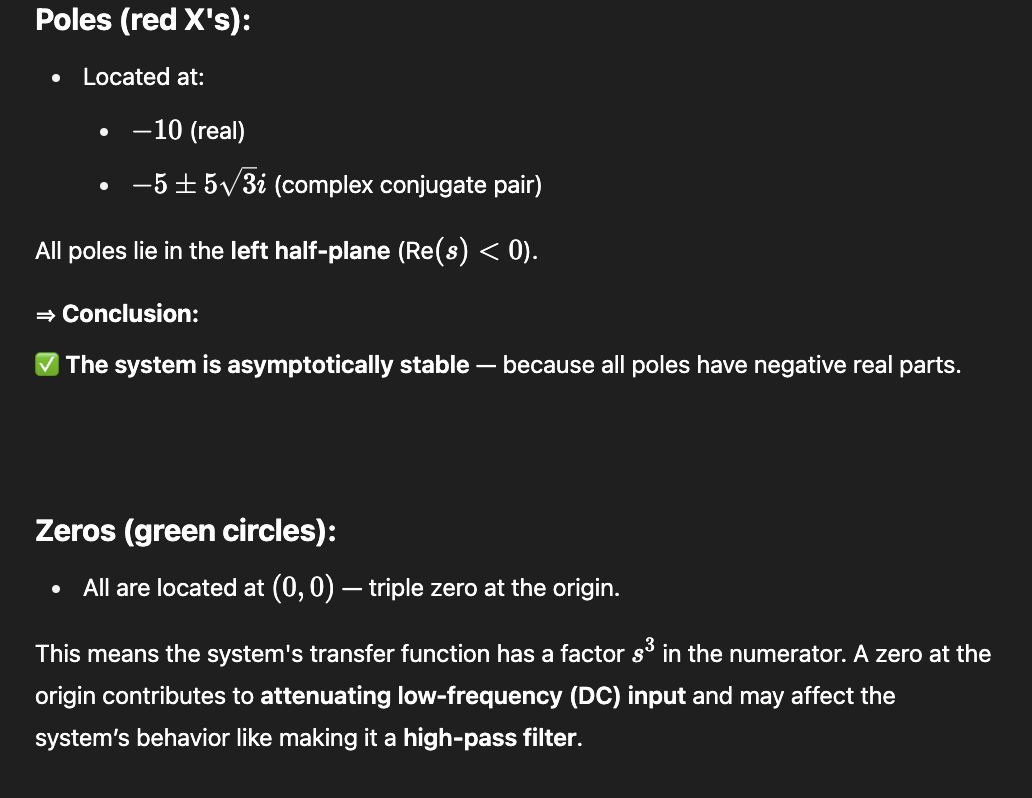

System is asymptotically stable (not marginally stable).

Has 3 zeros at the origin, which influences frequency response.

Nothing in this plot suggests marginality or instability.

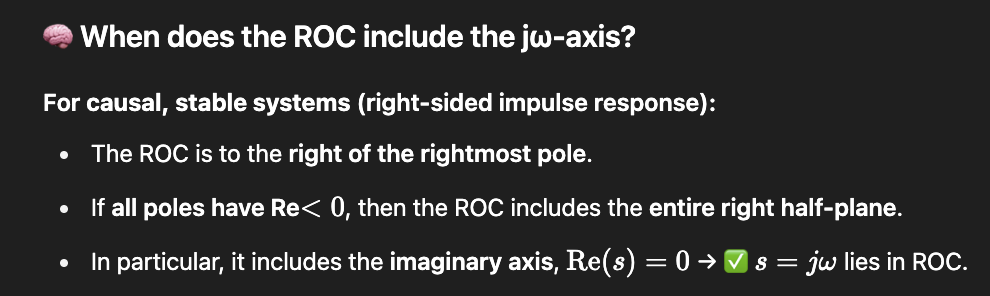

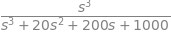

In [198]:
H = (s**2 / (s**2 + 10*s + 100)) * (s / (s + 10))
expand(H)

this matches the poles and zeros arrays from above, so the correct answer is this

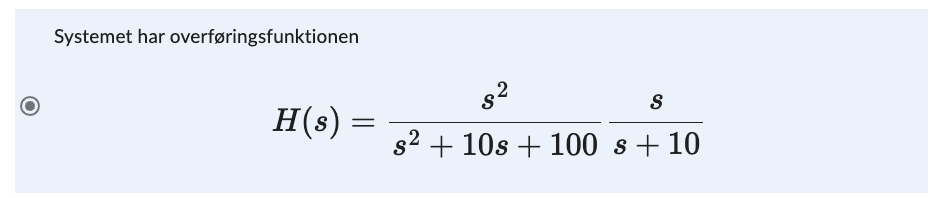

# 6

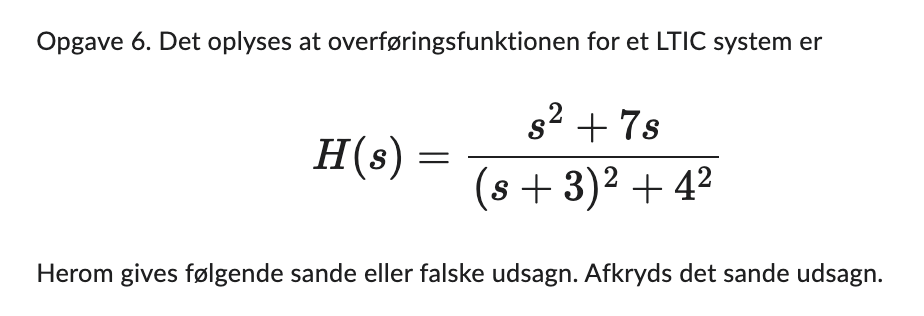

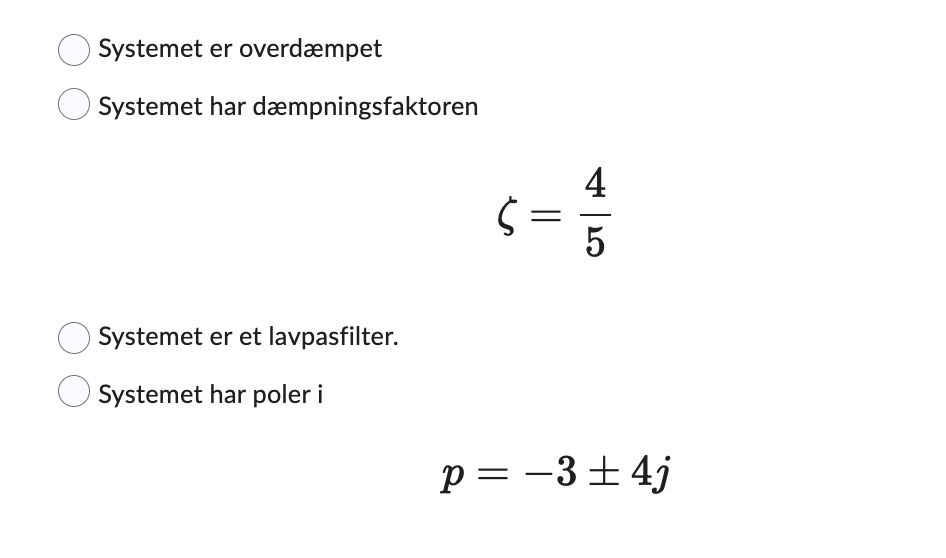

In [199]:
# Define the transfer function using scipy
numerator = [1, 7, 0]         # s^2 + 7s
denominator = [1, 6, 25]      # (s + 3)^2 + 4^2 = s^2 + 6s + 25

# Create the transfer function object
H = signal.TransferFunction(numerator, denominator)

# Get the poles
poles = H.poles
print("Poles:", poles)

# Compute damping ratio and natural frequency
real_part = np.real(poles[0])
imag_part = np.imag(poles[0])
omega_n = np.sqrt(real_part**2 + imag_part**2)
zeta = -real_part / omega_n
print("Damping ratio ζ =", zeta)

# Check overdamping
is_overdamped = np.all(np.imag(poles) == 0)
print("Overdamped:", is_overdamped)

Poles: [-3.+4.j -3.-4.j]
Damping ratio ζ = 0.6000000000000001
Overdamped: False


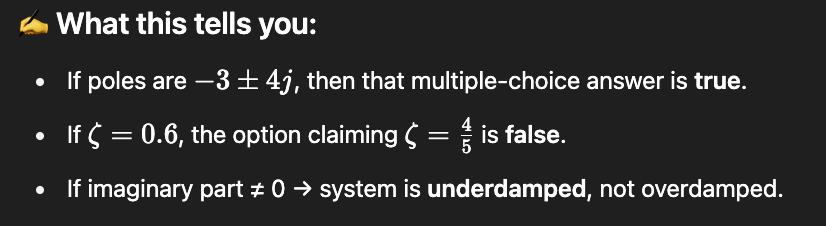

so the system has poles in p = -3 $\pm$ 4j is the correct answer

# 7

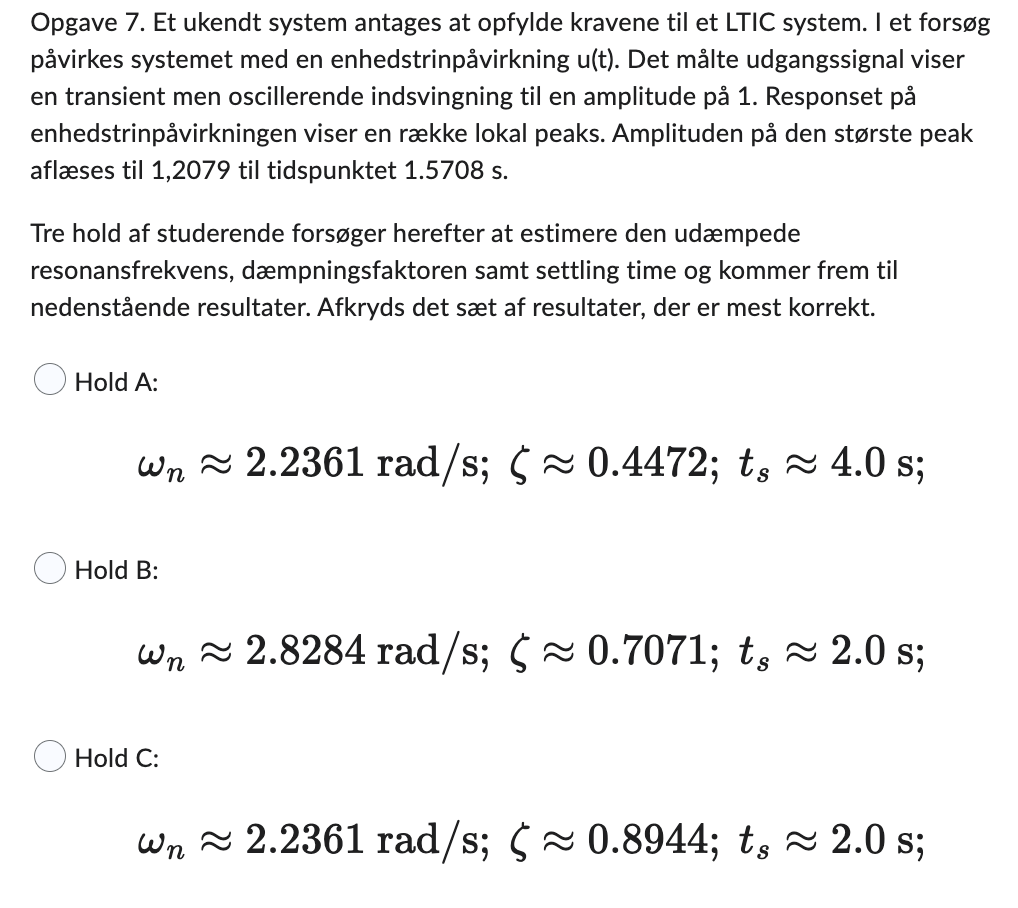

In [200]:
# Largest peak amplitude = 1.2079 at t = 1.5708 s
# Final amplitude = 1 (unit step input)

# Overshoot formula: Mp = exp(-ζπ / sqrt(1 - ζ²))
# Solve for ζ

Mp = 1.2079 - 1  # overshoot (as fraction, not percent)
Mp_ratio = 0.2079

zeta = symbols('zeta', positive=True)
eq = Eq(exp(-zeta * pi / sqrt(1 - zeta**2)), Mp_ratio)

zeta_val = solve(eq, zeta)
zeta_val

In [201]:
# Now calculate the natural frequency ω_n using the peak time:
# tp = π / (ω_n * sqrt(1 - ζ²))

zeta_num = zeta_val[0]
tp = 1.5708

wn = symbols('wn', positive=True)
eq_wn = Eq(pi / (wn * sqrt(1 - zeta_num**2)), tp)

wn_val = solve(eq_wn, wn)[0]
wn_val

In [202]:
# Now calculate the settling time ts ≈ 4 / (ζ * ω_n)

ts = 4 / (zeta_num * wn_val)
ts.evalf()

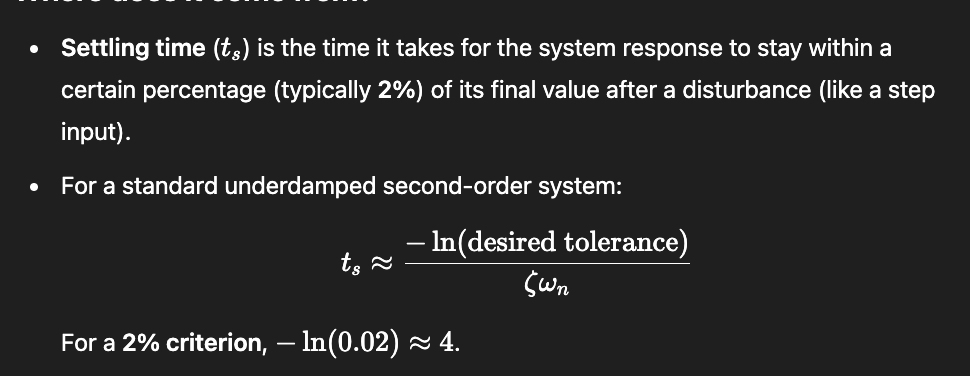